In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import rasterio

In [3]:
geotiffs_dir = Path('/data/MIDOSS/geotiffs/')
geotiff_watermask = np.load(Path('/data/MIDOSS/geotiffs/geotiff-watermask.npy'), allow_pickle=False, fix_imports=False)

In [4]:
f_name = geotiffs_dir / f"all_2018_01.tif"
dataset = rasterio.open(f_name)

In [5]:
myshape = dataset.read(boundless=True, fill_value=0).shape

In [6]:
vte_by_month = np.zeros((12, myshape[1], myshape[2]))
total_vte_by_month = np.zeros(12)
for month in range(1, 13):
    f_name = geotiffs_dir / f"all_2018_{month:02d}.tif"
    
    with rasterio.open(f_name) as dataset:
        vte_by_month[month - 1] = dataset.read(
        boundless=True, fill_value=0)
        total_vte_by_month[month - 1] = vte_by_month[month - 1].sum(where=geotiff_watermask)
        

In [7]:
mysum = total_vte_by_month.sum()
print (mysum)

537113.7490227574


In [8]:
year_gif = vte_by_month.sum(axis=0)*10000/mysum

<ipython-input-35-32e59af738c0>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  cmap.set_bad('black')
<ipython-input-35-32e59af738c0>:5: RuntimeWarning: divide by zero encountered in log
  colours = ax.pcolormesh(np.ma.array(np.log(year_gif), mask=1-geotiff_watermask), cmap='Reds', vmin=-5)


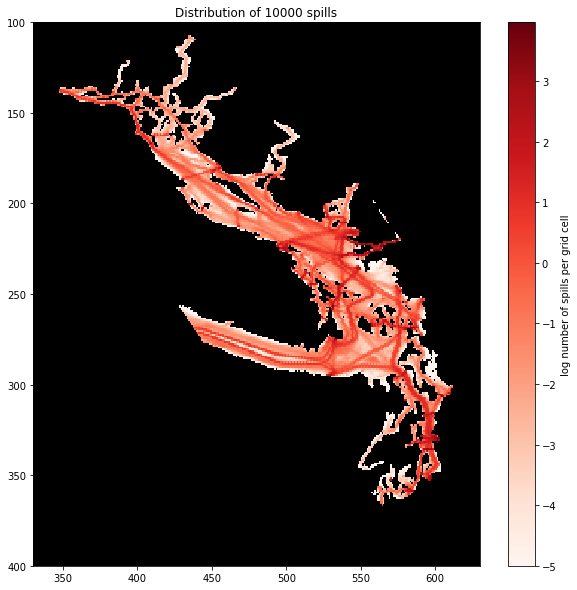

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = plt.get_cmap('Reds')
cmap.set_bad('black')

colours = ax.pcolormesh(np.ma.array(np.log(year_gif), mask=1-geotiff_watermask), cmap='Reds', vmin=-5)
cb = fig.colorbar(colours)
cb.set_label('log number of spills per grid cell')
ax.set_xlim(330, 630)
ax.set_ylim(100, 400)
ax.invert_yaxis();
ax.set_title("Distribution of 10000 spills")
fig.savefig('gif_plot.png')

<ipython-input-14-df7277687bf9>:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Reds").copy()
  cmap.set_bad('black')
<ipython-input-14-df7277687bf9>:5: RuntimeWarning: divide by zero encountered in log
  colours = ax.pcolormesh(np.ma.array(np.log(year_gif), mask=1-geotiff_watermask), cmap='Reds', vmin=-5)


Text(0.5, 1.0, 'Distribution of 10000 spills')

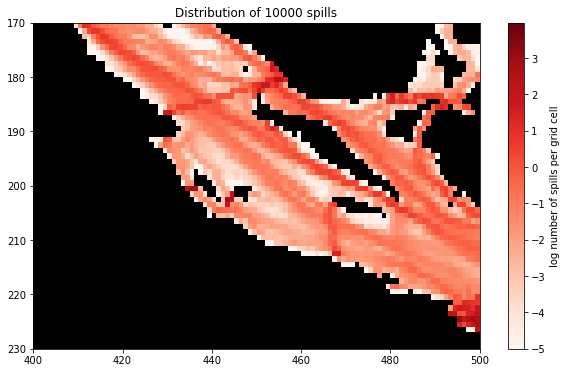

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
cmap = plt.get_cmap('Reds')
cmap.set_bad('black')

colours = ax.pcolormesh(np.ma.array(np.log(year_gif), mask=1-geotiff_watermask), cmap='Reds', vmin=-5)
cb = fig.colorbar(colours)
cb.set_label('log number of spills per grid cell')
ax.set_xlim(400, 500)
ax.set_ylim(170, 230)
ax.invert_yaxis();
ax.set_title("Distribution of 10000 spills")

In [37]:
np.log(1)

0.0

In [38]:
np.exp(1)

2.718281828459045